# Advanced Certification in AIML
## A Program by IIIT-H and TalentSprint

### Learning Objective

The objective of this experiment is to understand and visualize the Decision tree classifier.

### Dataset

#### History

This is a multivariate dataset introduced by R.A.Fisher (Father of Modern Statistics) for showcasing linear discriminant analysis. This is arguably the best known dataset in Feature Selection literature.


The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. One class is linearly separable from the other 2; the latter are NOT linearly separable from each other.

#### Description
The Iris dataset consists of 150 data instances. There are 3 classes (Iris Versicolor, Iris Setosa and Iris Virginica) each have 50 instances.


For each flower we have the below data attributes

- sepal length in cm
- sepal width in cm
- petal length in cm
- petal width in cm

To make our experiment easy we rename the classes  with numbers :

    "0": setosa
    "1": versicolor
    "2": virginica

#### Challenges

When we use the data with large number of features or dimensionality, models usually choke because

    1. Training time increases exponentially with number of features.
    2. Models have increasing risk of overfitting with increasing number of features.
    
To avoid the above mentioned problems while learning about data analysis, we use simple, well behaved, data that reduces the cognitive load, and makes it easier to debug as we are able to better comprehend the data we are working with.  

Hence, this is a good dataset to work on.

### Domain Information



Iris Plants are flowering plants with showy flowers. They are very popular among movie directors as it gives excellent background.

They are predominantly found in dry, semi-desert, or colder rocky mountainous areas in Europe and Asia. They have long, erect flowering stems and can produce white, yellow, orange, pink, purple, lavender, blue or brown colored flowers. There are 260 to 300 types of iris.

![alt text](https://cdn-images-1.medium.com/max/1275/1*7bnLKsChXq94QjtAiRn40w.png)

As you could see, flowers have 3 sepals and 3 petals.  The sepals are usually spreading or drop downwards and the petals stand upright, partly behind the sepal bases. However, the length and width of the sepals and petals vary for each type.


### Setup Steps:

In [18]:
#@title Please enter your registration id to start: { run: "auto", display-mode: "form" }
Id = "2302815" #@param {type:"string"}

In [19]:
#@title Please enter your password (normally your phone number) to continue: { run: "auto", display-mode: "form" }
password = "+6592721549" #@param {type:"string"}

In [20]:
#@title Run this cell to complete the setup for this Notebook
from IPython import get_ipython

ipython = get_ipython()

notebook= "U1W4_12_DT_Iris_data_Visualization_C" #name of the notebook

def setup():
#  ipython.magic("sx pip3 install torch")
    from IPython.display import HTML, display
    ipython.magic("sx apt-get install graphviz")
    ipython.magic("sx pip install graphviz")
    ipython.magic("sx wget https://cdn.iiith.talentsprint.com/aiml/Experiment_related_data/Iris.csv")
    display(HTML('<script src="https://staging.dashboard.talentsprint.com/aiml/record_ip.html?traineeId={0}&recordId={1}"></script>'.format(getId(),submission_id)))
    print("Setup completed successfully")
    return

def submit_notebook():
    ipython.magic("notebook -e "+ notebook + ".ipynb")

    import requests, json, base64, datetime

    url = "https://dashboard.talentsprint.com/xp/app/save_notebook_attempts"
    if not submission_id:
      data = {"id" : getId(), "notebook" : notebook, "mobile" : getPassword()}
      r = requests.post(url, data = data)
      r = json.loads(r.text)

      if r["status"] == "Success":
          return r["record_id"]
      elif "err" in r:
        print(r["err"])
        return None
      else:
        print ("Something is wrong, the notebook will not be submitted for grading")
        return None

    elif getAnswer() and getComplexity() and getAdditional() and getConcepts() and getWalkthrough() and getComments() and getMentorSupport():
      f = open(notebook + ".ipynb", "rb")
      file_hash = base64.b64encode(f.read())

      data = {"complexity" : Complexity, "additional" :Additional,
              "concepts" : Concepts, "record_id" : submission_id,
              "answer" : Answer, "id" : Id, "file_hash" : file_hash,
              "notebook" : notebook, "feedback_walkthrough":Walkthrough ,
              "feedback_experiments_input" : Comments,
              "feedback_inclass_mentor": Mentor_support}

      r = requests.post(url, data = data)
      r = json.loads(r.text)
      if "err" in r:
        print(r["err"])
        return None
      else:
        print("Your submission is successful.")
        print("Ref Id:", submission_id)
        print("Date of submission: ", r["date"])
        print("Time of submission: ", r["time"])
        print("View your submissions: https://aiml-iiith.talentsprint.com/notebook_submissions")
        #print("For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.")
        return submission_id
    else: submission_id


def getAdditional():
  try:
    if not Additional:
      raise NameError
    else:
      return Additional
  except NameError:
    print ("Please answer Additional Question")
    return None

def getComplexity():
  try:
    if not Complexity:
      raise NameError
    else:
      return Complexity
  except NameError:
    print ("Please answer Complexity Question")
    return None

def getConcepts():
  try:
    if not Concepts:
      raise NameError
    else:
      return Concepts
  except NameError:
    print ("Please answer Concepts Question")
    return None


def getWalkthrough():
  try:
    if not Walkthrough:
      raise NameError
    else:
      return Walkthrough
  except NameError:
    print ("Please answer Walkthrough Question")
    return None

def getComments():
  try:
    if not Comments:
      raise NameError
    else:
      return Comments
  except NameError:
    print ("Please answer Comments Question")
    return None


def getMentorSupport():
  try:
    if not Mentor_support:
      raise NameError
    else:
      return Mentor_support
  except NameError:
    print ("Please answer Mentor support Question")
    return None

def getAnswer():
  try:
    if not Answer:
      raise NameError
    else:
      return Answer
  except NameError:
    print ("Please answer Question")
    return None


def getId():
  try:
    return Id if Id else None
  except NameError:
    return None

def getPassword():
  try:
    return password if password else None
  except NameError:
    return None

submission_id = None
### Setup
if getPassword() and getId():
  submission_id = submit_notebook()
  if submission_id:
    setup()
else:
  print ("Please complete Id and Password cells before running setup")



Setup completed successfully


### Import required packages

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, export_graphviz # export_graphviz function creates a GraphViz representation of the decision tree
import graphviz  # graphviz is a graphical vizualisation of graph objects
import os

### Load the Iris data

In [22]:
iris = pd.read_csv("Iris.csv")

In [23]:
print(iris.head())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


### Get the features and labels of the dataset

In [24]:
labels = iris.Species
features = iris.drop(['Species', 'Id'], axis=1)

In [25]:
print(features)

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0              5.1           3.5            1.4           0.2
1              4.9           3.0            1.4           0.2
2              4.7           3.2            1.3           0.2
3              4.6           3.1            1.5           0.2
4              5.0           3.6            1.4           0.2
..             ...           ...            ...           ...
145            6.7           3.0            5.2           2.3
146            6.3           2.5            5.0           1.9
147            6.5           3.0            5.2           2.0
148            6.2           3.4            5.4           2.3
149            5.9           3.0            5.1           1.8

[150 rows x 4 columns]


### Training a  Classifier

* Iterating the depth ranging from 2 to 6
* Performing decision tree classifier with each depth and saving the decision graph

In [26]:
for depth in range(2, 7):
    # max_depth parameter regularize the tree, or limit the way it grows to prevent over-fitting
    # random_state generates the same sequence of random numbers everytime of the code execution
    clf = DecisionTreeClassifier(max_depth = depth, random_state=42)
    # Fitting the data
    clf.fit(features, labels)
    saveAs = "iris_dt_" + str(depth)
    save_dot = saveAs + ".dot"
    save_png = saveAs + ".png"
    # Exporting the model into a dot file
    graph = graphviz.Source(export_graphviz(clf, out_file=save_dot
       , feature_names=features.columns, class_names=['0', '1', '2']
       , filled = True))
    os.system("dot -T png -o " + save_png + " " + save_dot)

In [27]:
%ls *dot

iris_dt_2.dot  iris_dt_3.dot  iris_dt_4.dot  iris_dt_5.dot  iris_dt_6.dot


In [28]:
%ls *png

iris_dt_2.png  iris_dt_3.png  iris_dt_4.png  iris_dt_5.png  iris_dt_6.png


### Now let us see how the tree looks at each depth

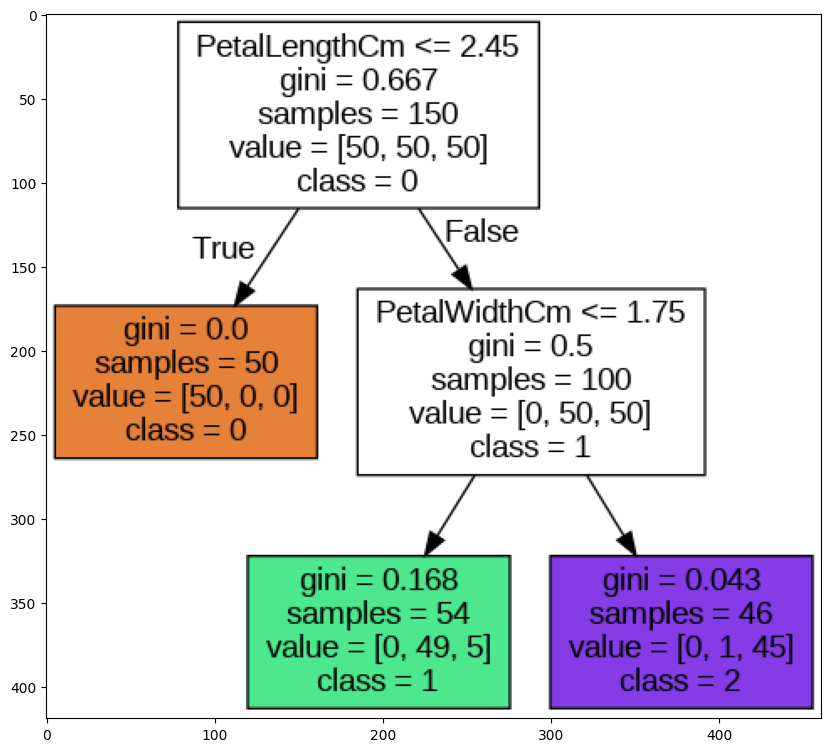

In [29]:
plt.figure(figsize=(10,10))
plt.imshow(plt.imread("iris_dt_2.png"))
plt.grid(False)

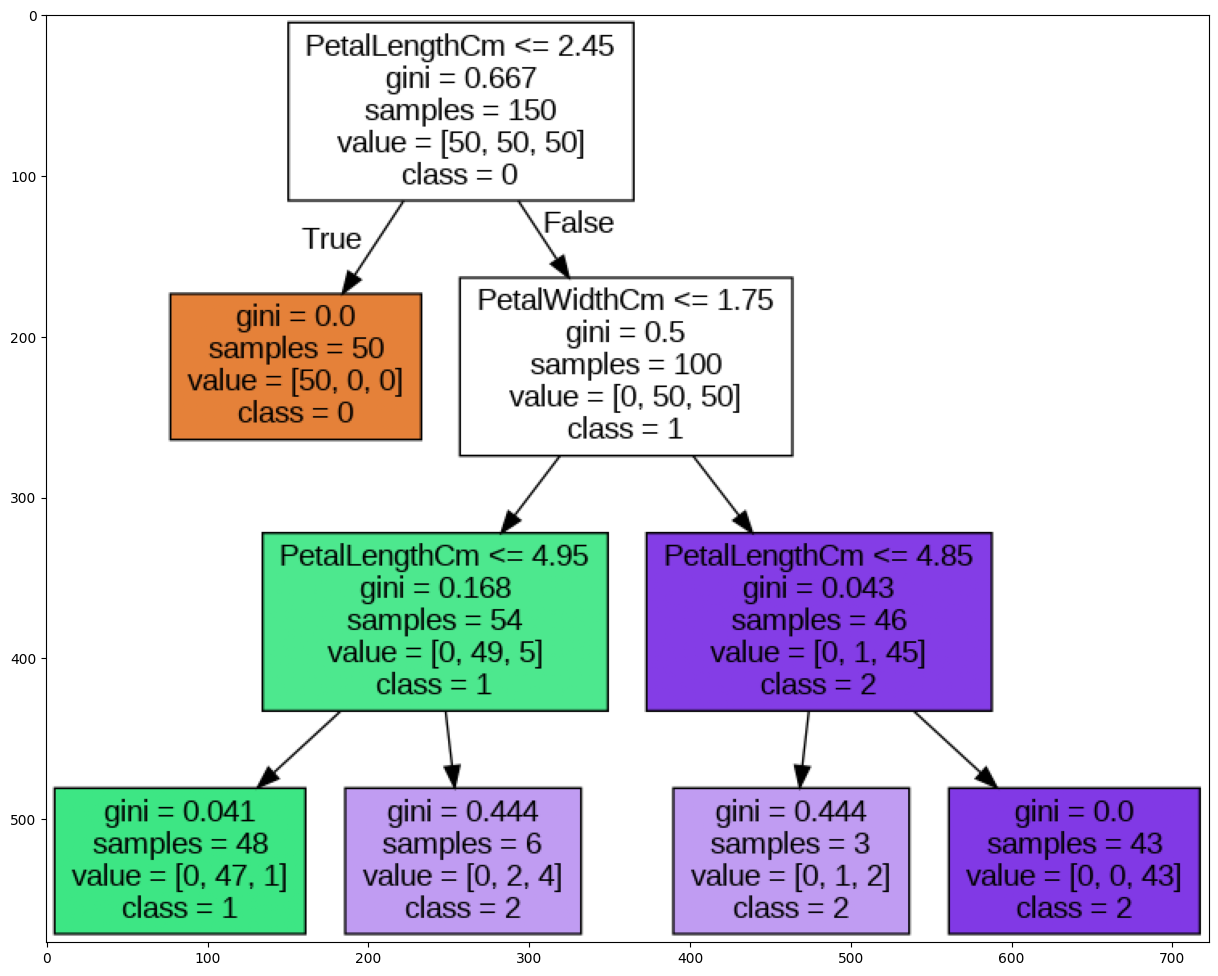

In [30]:
plt.figure(figsize=(15,15))
plt.imshow(plt.imread("iris_dt_3.png"))
plt.grid(False)

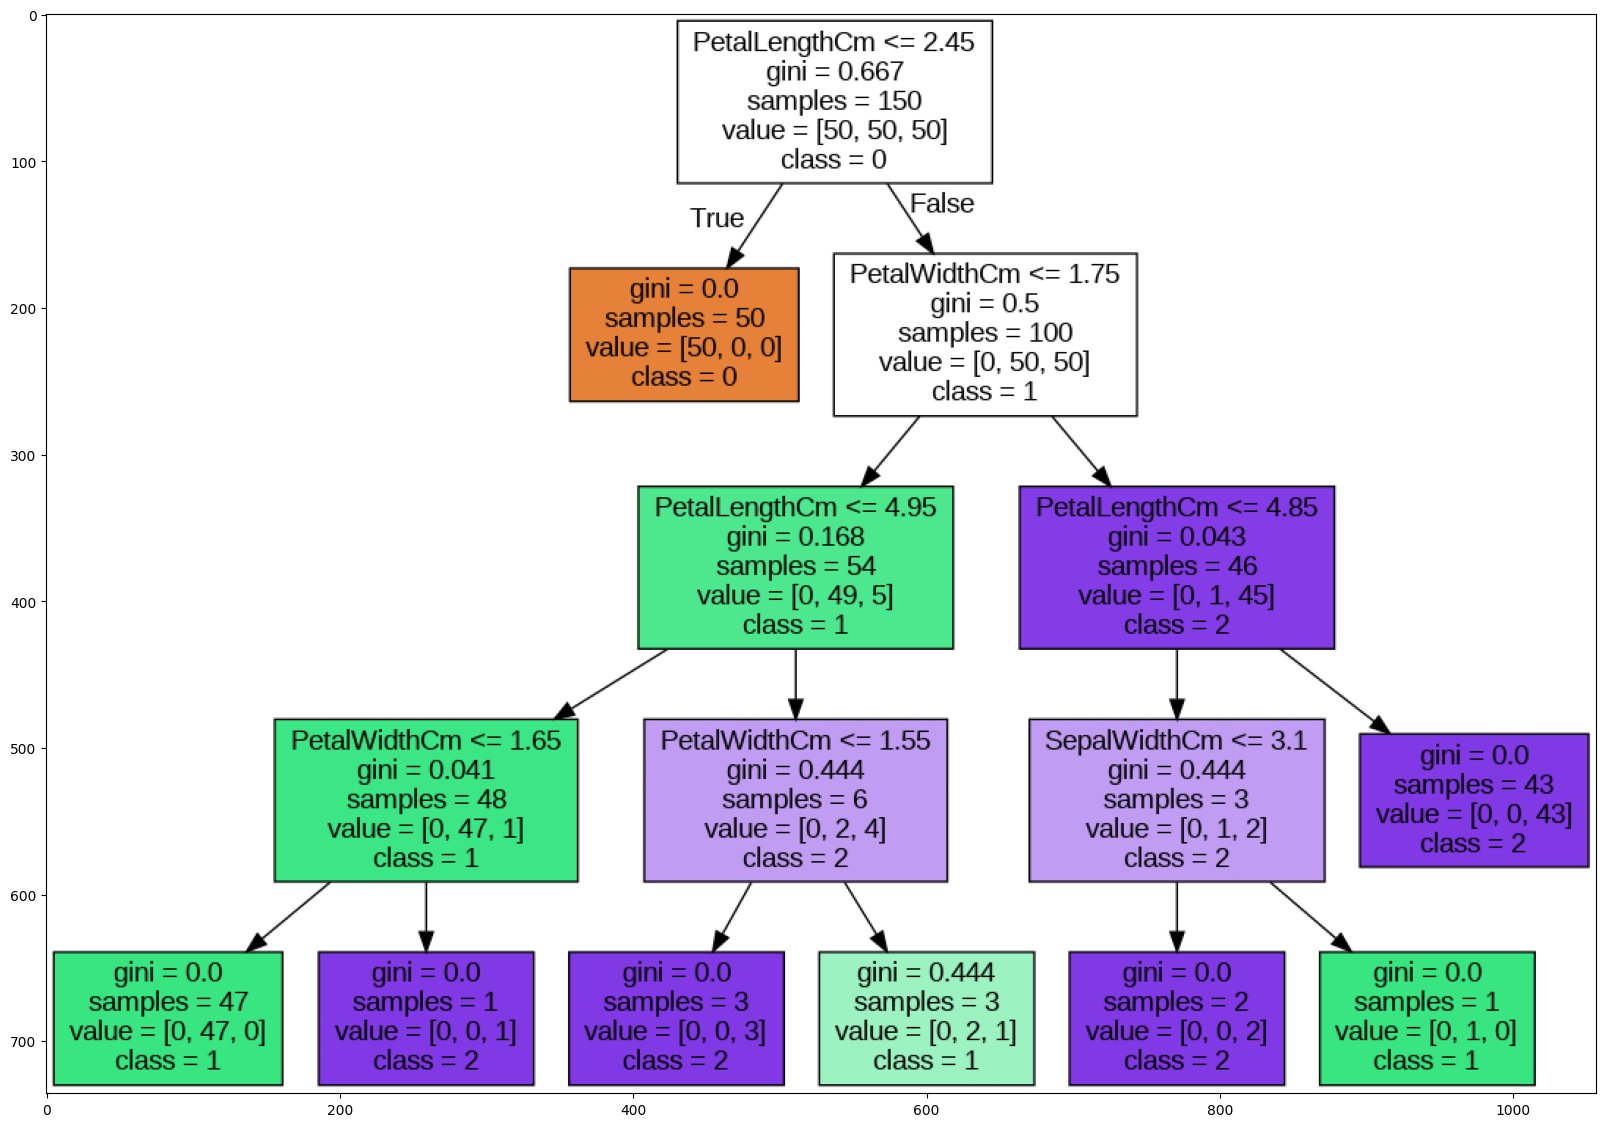

In [31]:
plt.figure(figsize=(20,20))
plt.imshow(plt.imread("iris_dt_4.png"))
plt.grid(False)

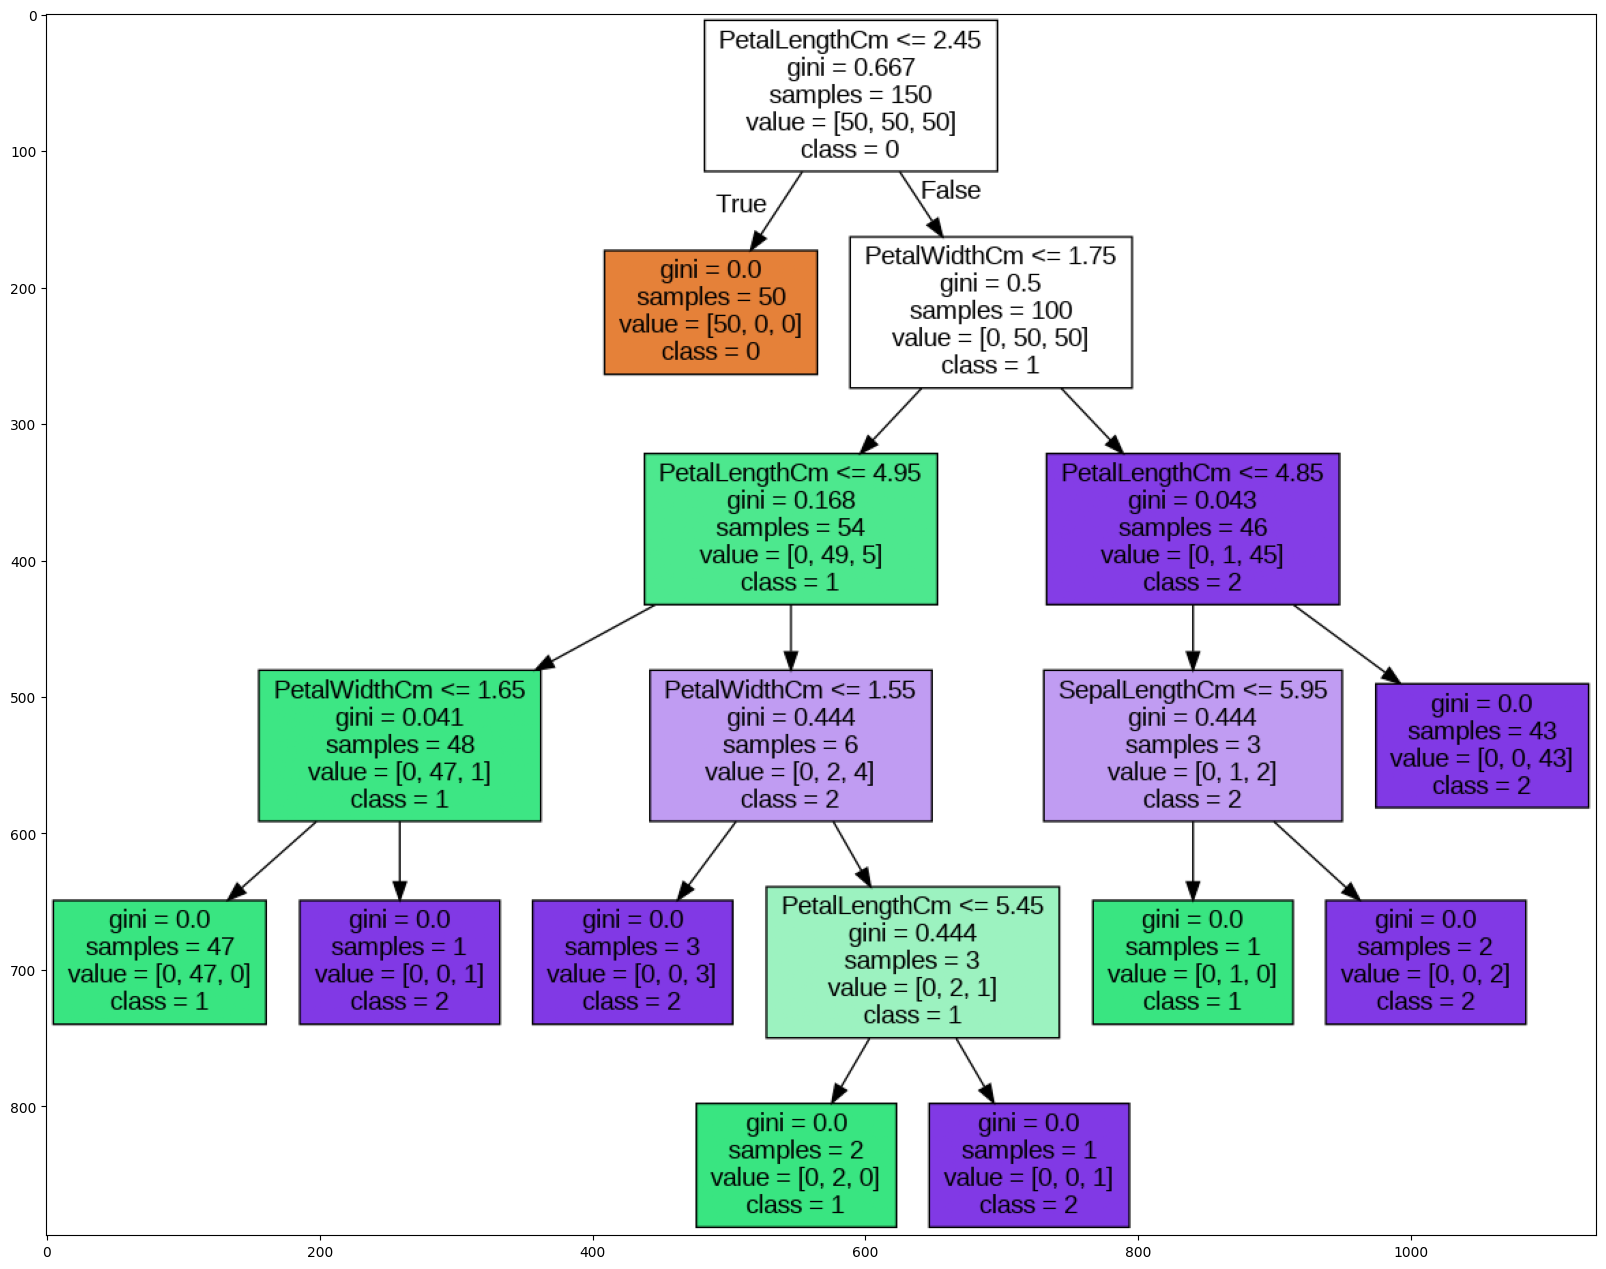

In [32]:
plt.figure(figsize=(20,20))
plt.imshow(plt.imread("iris_dt_5.png"))
plt.grid(False)

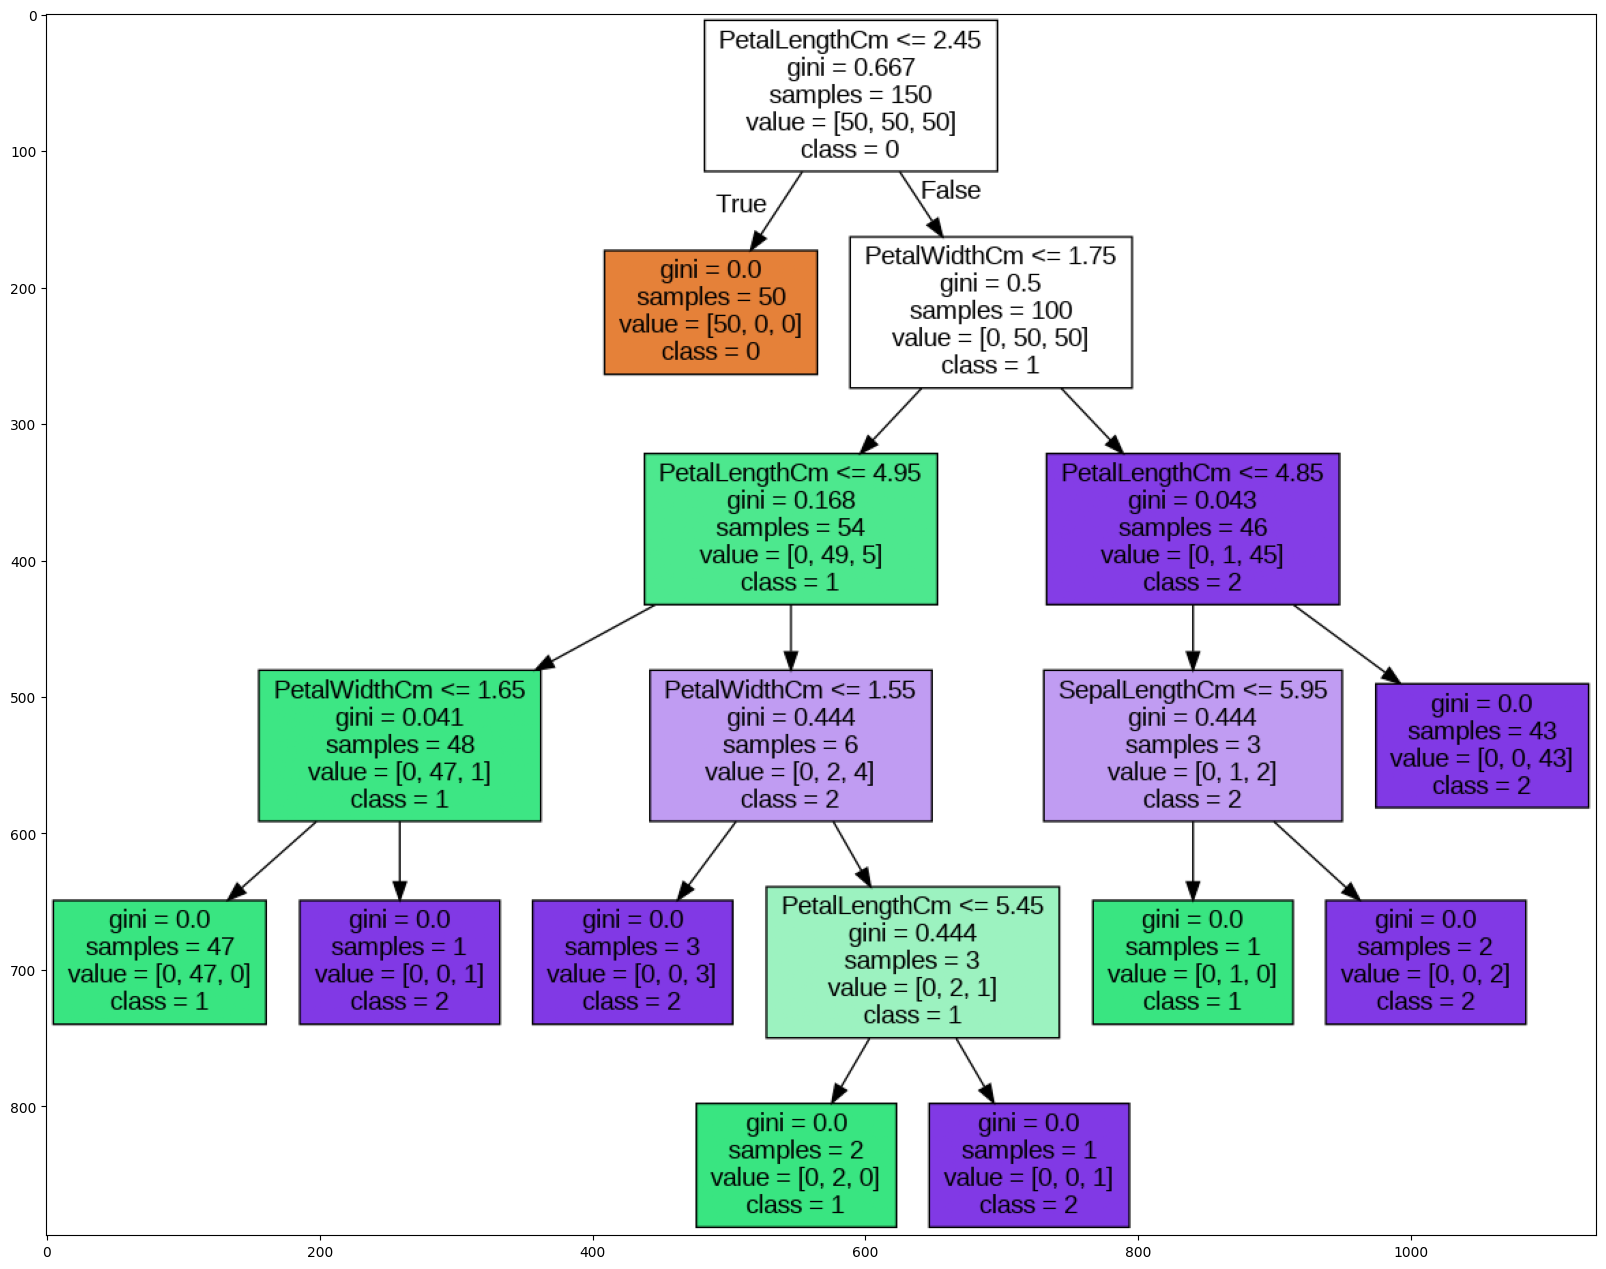

In [33]:
plt.figure(figsize=(20,20))
plt.imshow(plt.imread("iris_dt_6.png"))
plt.grid(False)

### Please answer the questions below to complete the experiment:




In [34]:
#@title One way of controlling the overfitting in the Decision Tree is limiting the depth of the tree? { run: "auto", form-width: "500px", display-mode: "form" }
Answer = "TRUE" #@param ["","TRUE", "FALSE"]

In [35]:
#@title How was the experiment? { run: "auto", form-width: "500px", display-mode: "form" }
Complexity = "Good, But Not Challenging for me" #@param ["","Too Simple, I am wasting time", "Good, But Not Challenging for me", "Good and Challenging for me", "Was Tough, but I did it", "Too Difficult for me"]


In [36]:
#@title If it was too easy, what more would you have liked to be added? If it was very difficult, what would you have liked to have been removed? { run: "auto", display-mode: "form" }
Additional = "na" #@param {type:"string"}


In [37]:
#@title Can you identify the concepts from the lecture which this experiment covered? { run: "auto", vertical-output: true, display-mode: "form" }
Concepts = "Yes" #@param ["","Yes", "No"]


In [38]:
#@title  Experiment walkthrough video? { run: "auto", vertical-output: true, display-mode: "form" }
Walkthrough = "Somewhat Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [39]:
#@title  Text and image description/explanation and code comments within the experiment: { run: "auto", vertical-output: true, display-mode: "form" }
Comments = "Very Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [40]:
#@title Mentor Support: { run: "auto", vertical-output: true, display-mode: "form" }
Mentor_support = "Very Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [41]:
#@title Run this cell to submit your notebook for grading { vertical-output: true }
try:
  if submission_id:
      return_id = submit_notebook()
      if return_id : submission_id = return_id
  else:
      print("Please complete the setup first.")
except NameError:
  print ("Please complete the setup first.")

Your submission is successful.
Ref Id: 4395
Date of submission:  24 May 2024
Time of submission:  16:43:00
View your submissions: https://aiml-iiith.talentsprint.com/notebook_submissions
